<a href="https://colab.research.google.com/github/aleshark87/data-intensive-project/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descrizione del problema

*In questo progetto si vuole realizzare un modello in grado di predire la potabilità dell'acqua in base a delle analisi effettuate*

## Importo le librerie necessarie

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from urllib.request import urlretrieve

##Caricamento dei dati


In [269]:
dataset_url = "https://github.com/aleshark87/data-intensive-project/raw/main/water_potability%20(2).csv"
dataset_filename = "water_potability.csv"

if not os.path.exists(dataset_filename):
  urlretrieve(dataset_url, dataset_filename)

dataset = pd.read_csv(dataset_filename, sep=",")
dataset.head(10)  

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


##Comprensione delle feature


###Unità di misura:


*  **NTU**: Nephelometric Turbidity unit
*  **ppm**: Parti per milione
*  **μg/L**: Microgrammi per litro
*  **mg/L**: Milligrammi per litro

###Descrizione:

1. **ph**: Misura del pH dell'acqua.
2. **Hardness**: Misura della durezza dell'acqua. Viene espressa in mg/L.
3. **Solids**: Misura dei materiali disciolti. Viene espressa in ppm.
4. **Chloramines**: Misura delle clorammine in ppm.
5. **Sulfate**: Misura dei solfati in mg/L.
6. **Conductivity**: Conduttività elettrica dell'acqua in μS/cm.
7. **Organic_carbon**: Carbonio organico in ppm.
8. **Trihalomethanes**: Misura dei trialometani in μg/L.
9. **Turbidity**: Misura della torbidità in NTU.
10. **Potability**: Indica se l'acqua è potabile, 1 significa potabile e 0 significa non potabile.



##Esplorazione delle feature

In [270]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


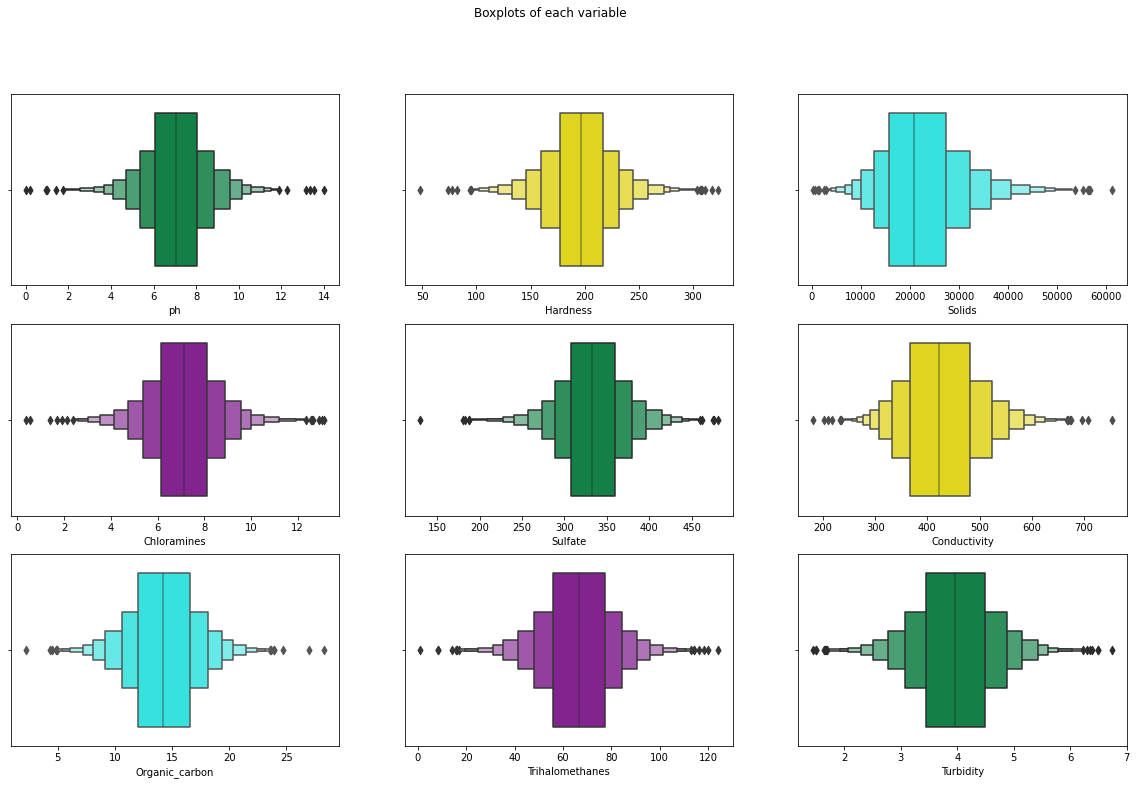

In [271]:
colors = ['#009246','#fff000','#18fff9','#8f139f']
fig, axes = plt.subplots(3, 3,figsize=(20,12))
column = dataset.columns
fig.suptitle('Boxplots of each variable')
sns.boxenplot(ax=axes[0,0],x=column[0],data=dataset,color=colors[0])
sns.boxenplot(ax=axes[0,1],x=column[1],data=dataset,color=colors[1])
sns.boxenplot(ax=axes[0,2],x=column[2],data=dataset,color=colors[2])
sns.boxenplot(ax=axes[1,0],x=column[3],data=dataset,color=colors[3])
sns.boxenplot(ax=axes[1,1],x=column[4],data=dataset,color=colors[0])
sns.boxenplot(ax=axes[1,2],x=column[5],data=dataset,color=colors[1])
sns.boxenplot(ax=axes[2,0],x=column[6],data=dataset,color=colors[2])
sns.boxenplot(ax=axes[2,1],x=column[7],data=dataset,color=colors[3])
sns.boxenplot(ax=axes[2,2],x=column[8],data=dataset,color=colors[0])
plt.show()

Il dataset ha alcuni valori null, vediamo quanti sono.

In [272]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Rimuoviamo i valori null.

In [273]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

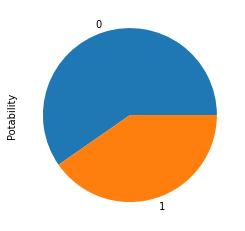

In [274]:
dataset["Potability"].value_counts().plot.pie()

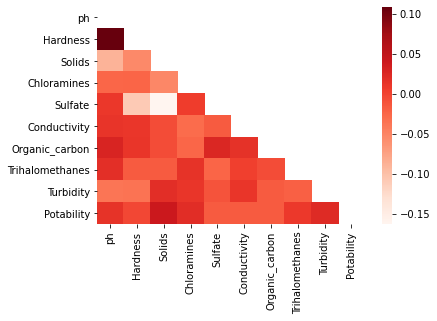

In [275]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Reds");

**Preparazione del modello**

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

SPlit in training e validation

In [277]:
X = dataset.drop(columns="Potability")
y = dataset["Potability"]

In [278]:
X_train, X_val, y_train, y_val = train_test_split(
    X,y,
    test_size = 1/3,
    random_state = 42
)

**Perceptron non standardizzato**

In [279]:
not_std_model = Pipeline([
                  ("perc", Perceptron(n_jobs=-1, random_state=42))
])

In [280]:
not_std_model.fit(X_train, y_train)
print("R-squared coefficient:") 
not_std_model.score(X_val, y_val)

R-squared coefficient:


0.6005961251862891

Standardizzando le feature il tasso di accuratezza sale leggermente. Possiamo provare la **regolarizzazione con norma L1**

In [281]:
std_l1_model = Pipeline([
                      ("scaler", RobustScaler()),
                      ("perc", Perceptron(penalty="l1", alpha=0.0001, n_jobs=-1, random_state=42))
])

In [282]:
std_l1_model.fit(X_train, y_train)
print("R-squared coefficient:")
std_l1_model.score(X_val, y_val)

R-squared coefficient:


0.5096870342771982

In [283]:
col_coef = pd.DataFrame(std_l1_model.named_steps["perc"].coef_[0], columns=["coefficients"], index=X.columns)
col_coef

,coefficients
ph,0.000000
Hardness,0.000000
Solids,0.000000
Chloramines,0.000000
Sulfate,0.000000
Conductivity,-0.370895
Organic_carbon,-1.083397
Trihalomethanes,0.000000
Turbidity,-0.476348


In [284]:
col_coef[col_coef.coefficients == 0].size

6

In [285]:
#dataset.drop(columns=col_coef[col_coef.coefficients == 0].index, inplace=True)

In [286]:
X = dataset.drop(columns="Potability")
y = dataset["Potability"]

In [287]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [288]:
index = ["not potable", "potable"]
classes = ["not Potable[P]", "Potable[P]"]
#pd.DataFrame(confusion_matrix(y_val, std_l1_model.predict(X_val)), columns=classes, index = index)

# Bilanciamento classi e Scaling dei dati


In [289]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [290]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

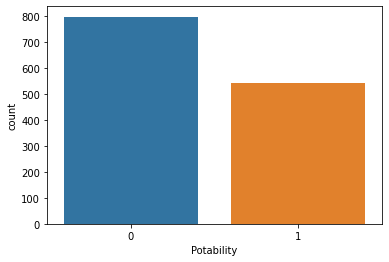

In [291]:
sns.countplot(x=y_train)

Faremo un under-sample della maggioranza e un over-sample della minoranza.
Qui l'under-sample.

In [292]:
rus = RandomUnderSampler(sampling_strategy=0.75)
X_train,y_train = rus.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


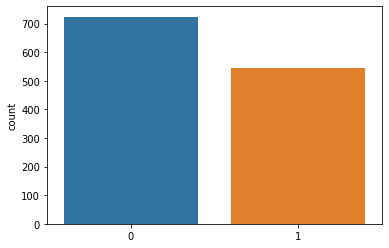

In [293]:
sns.countplot(x=y_train)

Over-sample della minoranza tramite SMOTE.



In [294]:
smote = SMOTE(sampling_strategy='minority')
X_train,y_train = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


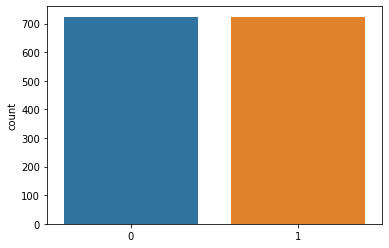

In [295]:
sns.countplot(x=y_train)

# **Modellazione**

In [296]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Creiamo dei dizionari per memorizzare informazioni sui modelli

In [297]:
scores = {}
f1_scores = {}
precision = {}
recall = {}

**Perceptron**

In [298]:
model = Pipeline([
    ("scaler", RobustScaler()),
    ("perc", Perceptron(n_jobs=-1, random_state=42))
])

param = {
    "scaler": [None, StandardScaler(), RobustScaler(), MinMaxScaler()],
    "perc__penalty": ["l2", "l1", "elasticnet"],
    "perc__alpha": np.logspace(-4, 0, 5),
    "perc__fit_intercept": [False, True]
}

In [299]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)

In [300]:
perc_gv = GridSearchCV(model, param, cv=skf, n_jobs=-1)
perc_gv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('perc',
                                        Perceptron(alpha=0.0001,
                                                   class_weight=None,
                                                   early_stopping=False,
                                                   eta0=1.0, fit_intercept=True,
                                                   max_iter=1000,
                                 

In [301]:
print("Punteggio migliore: {score}".format(score=perc_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, perc_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, perc_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, perc_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=perc_gv.best_params_))

scores["perceptron"] = perc_gv.score(X_val, y_val);
f1_scores["perceptron"] = f1_score(y_val, perc_gv.predict(X_val), average="binary")
precision["perceptron"] = precision_score(y_val, perc_gv.predict(X_val))
recall["perceptron"] = recall_score(y_val, perc_gv.predict(X_val))

Punteggio migliore: 0.6005961251862891
F1 score: 0.0
Precision score: 0.0
Recall score: 0.0
Parametri migliori: {'perc__alpha': 0.0001, 'perc__fit_intercept': False, 'perc__penalty': 'l1', 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [302]:
index = ["Not potable", "Potable"]
classes = ["Not potable[P]", "Potable[P]"]
perc_conf = pd.DataFrame(confusion_matrix(y, perc_gv.predict(X)), columns=classes, index = index)
perc_conf

,Not potable[P],Potable[P]
Not potable,1200,0
Potable,811,0


**Regressione Logistica**

In [303]:
log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(solver='saga', random_state=42))
])

log_grid = {
    "scaler": [None, StandardScaler(), RobustScaler(), MinMaxScaler()],
    "log_reg__penalty": ["l2", "l1"],
    "log_reg__C": np.logspace(-3, 3, 10),
    "log_reg__fit_intercept": [False, True]
}

In [304]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)
log_gv = GridSearchCV(log_model, log_grid, cv=skf, n_jobs=-1)
log_gv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                  

In [305]:
print("Punteggio migliore: {score}".format(score=log_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, log_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, log_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, log_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=log_gv.best_params_))

scores["logistic"] = log_gv.score(X_val, y_val);
f1_scores["logistic"] = f1_score(y_val, log_gv.predict(X_val), average="binary")
precision["logistic"] = precision_score(y_val, log_gv.predict(X_val))
recall["logistic"] = recall_score(y_val, log_gv.predict(X_val))

Punteggio migliore: 0.4828614008941878
F1 score: 0.4128595600676819
Precision score: 0.37770897832817335
Recall score: 0.4552238805970149
Parametri migliori: {'log_reg__C': 0.001, 'log_reg__fit_intercept': True, 'log_reg__penalty': 'l2', 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}


In [306]:
index = ["Not potable", "Potable"]
classes = ["Not potable[P]", "Potable[P]"]
perc_conf = pd.DataFrame(confusion_matrix(y, log_gv.predict(X)), columns=classes, index = index)
perc_conf

,Not potable[P],Potable[P]
Not potable,642,558
Potable,415,396


**SVM**

In [307]:
svc_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(dual=False, random_state=42))
])

svc_grid = {
    "scaler": [None, StandardScaler()],
    "svc__penalty": ["l2", "l1"],
    "svc__loss": ["hinge", "squared_hinge"],
    "svc__fit_intercept": [False, True],
    "svc__class_weight": [None, "balanced"],
    "svc__C": np.logspace(-3, 3, 10)
}

In [308]:
skf = StratifiedKFold(5, shuffle=True, random_state=42)
svc_gv = GridSearchCV(svc_model, svc_grid, cv=skf, n_jobs=-1)
svc_gv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty=

In [309]:
print("Punteggio migliore: {score}".format(score=svc_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, svc_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, svc_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, svc_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=svc_gv.best_params_))

scores["svc"] = svc_gv.score(X_val, y_val);
f1_scores["svc"] = f1_score(y_val, svc_gv.predict(X_val), average="binary")
precision["svc"] = precision_score(y_val, svc_gv.predict(X_val))
recall["svc"] = recall_score(y_val, svc_gv.predict(X_val))

Punteggio migliore: 0.46646795827123694
F1 score: 0.42258064516129035
Precision score: 0.3721590909090909
Recall score: 0.48880597014925375
Parametri migliori: {'scaler': None, 'svc__C': 0.004641588833612777, 'svc__class_weight': 'balanced', 'svc__fit_intercept': True, 'svc__loss': 'squared_hinge', 'svc__penalty': 'l2'}


In [310]:
index = ["Not potable", "Potable"]
classes = ["Not potable[P]", "Potable[P]"]
perc_conf = pd.DataFrame(confusion_matrix(y_val, svc_gv.predict(X_val)), columns=classes, index = index)
perc_conf

,Not potable[P],Potable[P]
Not potable,182,221
Potable,137,131


**Decision tree**

In [311]:
num_features = X.columns.size

tree_model = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(class_weight="balanced", random_state=42))
])

tree_grid = {'scaler': [None, StandardScaler()],
             'tree__min_samples_split': range(1, 5),
             'tree__min_samples_leaf': range(3, 8), 
             'tree__max_depth': range(4,8),
             'tree__max_features': range(2, num_features)}

In [312]:
tree_gv = GridSearchCV(tree_model, tree_grid, cv=skf, n_jobs=-1)
tree_gv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight='balanced',
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                  

In [313]:
print("Punteggio migliore: {score}".format(score=tree_gv.score(X_val, y_val)));
print("F1 score: {score}".format(score=f1_score(y_val, tree_gv.predict(X_val), average="binary")));
print("Precision score: {score}".format(score=precision_score(y_val, tree_gv.predict(X_val))))
print("Recall score: {score}".format(score=recall_score(y_val, tree_gv.predict(X_val))))
print("Parametri migliori: {params}".format(params=tree_gv.best_params_))

scores["tree"] = tree_gv.score(X_val, y_val);
f1_scores["tree"] = f1_score(y_val, tree_gv.predict(X_val), average="binary")
precision["tree"] = precision_score(y_val, tree_gv.predict(X_val))
recall["tree"] = recall_score(y_val, tree_gv.predict(X_val))

Punteggio migliore: 0.5856929955290611
F1 score: 0.5351170568561873
Precision score: 0.48484848484848486
Recall score: 0.5970149253731343
Parametri migliori: {'scaler': None, 'tree__max_depth': 7, 'tree__max_features': 4, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}


In [314]:
tree_conf = pd.DataFrame(confusion_matrix(y_val, tree_gv.predict(X_val)), columns=classes, index = index)
tree_conf

,Not potable[P],Potable[P]
Not potable,233,170
Potable,108,160


**XGBOOST**

In [315]:
from xgboost import XGBClassifier
train_data = pd.DataFrame(X_train, columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

In [316]:
model = XGBClassifier(nthread=8, objective='binary:logistic')


parameters = {
    'eta': [0.002, 0.1],
    'max_depth': [6,8],
    'n_estimators': [900],
    'alpha': [0.0001, 0.001]
}

skf = StratifiedKFold(5, shuffle=True, random_state=42)
gs = GridSearchCV(model, parameters, cv=skf)

gs.fit(train_data, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=8, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001], 'eta': [0.002, 0.1],
                         'max_depth': 

In [317]:
y_pred = gs.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
pd.DataFrame(cm, index=index, columns=classes)

,Not potable[P],Potable[P]
Not potable,261,142
Potable,113,155


In [340]:
print("Punteggio migliore: {score}".format(score=gs.score(X_val, y_val)));
print("Precision score: {score}".format(score=precision_score(y_val, y_pred)))
print("Recall score: {score}".format(score=recall_score(y_val, y_pred)))
print("Parametri migliori: {params}".format(params=gs.best_params_))

scores["xgb"] = gs.score(X_val, y_val)
f1_scores["xgb"] = f1_score(y_val, y_pred, average="binary")
precision["xgb"] = precision_score(y_val, y_pred)
#recall["forest"] = recall_score(y_val, forest_gv.predict(X_val))

Punteggio migliore: 0.6199701937406855
Precision score: 0.5218855218855218
Recall score: 0.5783582089552238
Parametri migliori: {'alpha': 0.0001, 'eta': 0.002, 'max_depth': 6, 'n_estimators': 900}


TypeError: ignored

**Valutazione dei modelli utilizzati**

In [341]:
pd.DataFrame.from_dict(scores, orient="index", columns=["R^2 score"])

,R^2 score
perceptron,0.600596
logistic,0.482861
svc,0.466468
tree,0.585693
xgboost,0.619970
xgb,0.619970
